# Questions to answer
* Q1: What are the most popular movie genres?
* Q2: Which actors have played in the most amount of movies?
* Q3: Can we predict a movie rating?

# Q1: What are the most popular and the least popular movie genres?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
dft = pd.read_csv('./titles.csv')
dfc = pd.read_csv('./credits.csv')

### Review the data we are working with

In [3]:
dft.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
dfc.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [5]:
dft.genres.value_counts()

['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: genres, Length: 1626, dtype: int64

### Create a list of all the genres in the data

In [6]:
global global_genre_set
global_genre_set = set()

def extract_genre_list(col):
    genre_list = col.replace("[","").replace("]","").replace("'","").split(",")
    for genre in genre_list:
        if genre != '': global_genre_set.add(genre.strip())

In [7]:
dft.genres.apply(extract_genre_list)
print(global_genre_set)

{'music', 'thriller', 'horror', 'comedy', 'animation', 'family', 'crime', 'documentation', 'western', 'reality', 'fantasy', 'european', 'drama', 'romance', 'history', 'action', 'war', 'scifi', 'sport'}


### Create a helper function for counting values

In [8]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to average values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

### Create a helper function for plotting value counts

In [9]:
def clean_and_plot(df, title='Popular movie genres', plot=True):
    '''
    INPUT 
        df - a dataframe holding the genres column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of movie genres
        Displays a plot of pretty things related to the genres column.
    '''
    genres = df['genres'].value_counts().reset_index()
    genres.rename(columns={'index': 'genre', 'genres': 'count'}, inplace=True)
    genres_df = total_count(genres, 'genre', 'count', global_genre_set)

    genres_df.set_index('genre', inplace=True)
    if plot:
        (genres_df/genres_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_genres_df = genres_df/genres_df.sum()
    return genres_df

### Answer to: "What are the most popular and the least popular movie genres?"

* Drama, comedy and thriller are the 3 most popular movie genres on Netflix.
* Western, war, sport are the 3 least popular movie genres on Netflix.

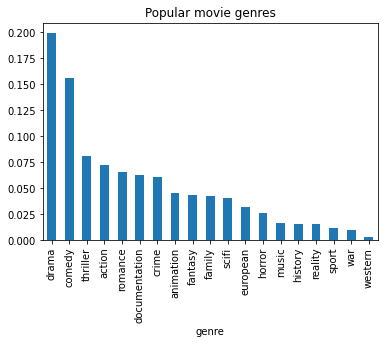

In [10]:
props_df = clean_and_plot(dft)

# Q2: Which actors have played in the most amount of movies and which directors made the most movies?

In [11]:
dfc.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [12]:
dfc.groupby("role", as_index=False).size()

,role,size
0,ACTOR,72690
1,DIRECTOR,4523


In [13]:
dfc[dfc.role=="ACTOR"] \
.groupby(["name"], as_index=False) \
.size() \
.sort_values(by=["size"],ascending=False) \
.rename({"size":"num_of_films"}, axis=1) \
.head(10)

,name,num_of_films
42864,Shah Rukh Khan,30
6220,Boman Irani,25
24536,Kareena Kapoor Khan,25
3906,Anupam Kher,25
45568,Takahiro Sakurai,22
36577,Paresh Rawal,22
38214,Priyanka Chopra Jonas,21
34780,Nawazuddin Siddiqui,21
2426,Amitabh Bachchan,19
34534,Naseeruddin Shah,19


In [14]:
dfc[dfc.role=="DIRECTOR"] \
.groupby(["name"], as_index=False) \
.size() \
.sort_values(by=["size"],ascending=False) \
.rename({"size":"num_of_films"}, axis=1) \
.head(10)

,name,num_of_films
2569,Raúl Campos,21
1226,Jan Suter,20
1259,Jay Karas,16
1940,Marcus Raboy,15
2729,Ryan Polito,13
1257,Jay Chapman,12
467,Cathy Garcia-Molina,12
3361,Youssef Chahine,11
1529,Justin G. Dyck,9
3208,Umesh Mehra,8


# Q3: Can we predict a movie rating?

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from collections import defaultdict

In [16]:
dft = pd.read_csv('./titles.csv')
dfc = pd.read_csv('./credits.csv')

Features to use:
* Production country (categorical)
* Genre (categorical)
* Runtime (numerical)
* Release year (numerical)
* Age-certification (categorical)
* Actors

In [17]:
dft.groupby("type", as_index=False).size()

,type,size
0,MOVIE,3759
1,SHOW,2047


### Filter out by movies only and drop unnecessary data

In [18]:
dft = dft[dft.type == "MOVIE"]

In [19]:
df = pd.merge(dfc,dft,on='id',how='left')

In [20]:
# Drop fields which we'll never use to reduce data size
df = df.drop(columns=["id","name","role","character","title","type","description","seasons","imdb_id","imdb_votes","tmdb_popularity","tmdb_score"])

In [21]:
# TEMP:
# drop_indices = np.random.choice(df.index, 75000, replace=False)
# df = df.drop(drop_indices)

In [22]:
df.shape[0]

77213

### Create dummies for actors, genres, production_countries, age_certification

In [23]:
def create_dummy_data(df, col_name, to_clean=False):
    if to_clean:
        df_temp = df[col_name] \
            .str.replace("[","", regex=False) \
            .str.replace("]","", regex=False) \
            .str.replace("'","", regex=False) \
            .str.split(", ") \
            .str.join("|") \
            .str.get_dummies()
        df = pd.concat([df_temp, df], axis=1, join="inner")
        df.drop_duplicates(inplace=True)
        df.drop(columns=col_name, inplace=True)
    else:
        df = pd.get_dummies(df, columns=[col_name])
    return df

In [24]:
df2 = create_dummy_data(df.copy(), "person_id")

In [25]:
df3 = create_dummy_data(df2, "genres", to_clean=True)

In [26]:
df4 = create_dummy_data(df3, "production_countries", to_clean=True)

In [27]:
df5 = create_dummy_data(df4, "age_certification", to_clean=False)

In [28]:
df5.head(5)

,AE,AF,AL,AO,AR,AT,AU,BD,BE,BF,...,person_id_2371458,person_id_2371513,person_id_2371527,person_id_2371563,person_id_2371585,age_certification_G,age_certification_NC-17,age_certification_PG,age_certification_PG-13,age_certification_R
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [207]:
df5.shape[0]

74140

### Drop NAs

In [29]:
df6 = df5.dropna(axis=0, how='any')

In [30]:
df6.isna().sum()

AE                         0
AF                         0
AL                         0
AO                         0
AR                         0
                          ..
age_certification_G        0
age_certification_NC-17    0
age_certification_PG       0
age_certification_PG-13    0
age_certification_R        0
Length: 54087, dtype: int64

https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

### Prepare data for ML

In [31]:
y = df6["imdb_score"]
X = df6.drop(columns=["imdb_score"])
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

In [ ]:
0.626

In [ ]:
xgb_model.save_model("xgb_saved_model.json")